lets cluster 100 so that it is easy to apply the elastic net 

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

import funs as fu
import os 


## constants and functions

In [2]:

PATH_TO_FILE = '../data_in/flexpart-mosaic-data-alias/AIRTRACER_100m.nc'

LA = 'lat'
LO = 'lon'
TI = 'time'
AG = 'age'
AT = 'AIRTRACER'
L = 'lab'
CM = 'tab20'

DATA_OUT = '../data_out'


# code

In [3]:


# def main():

In [4]:

ds = xr.open_mfdataset(PATH_TO_FILE)

In [5]:
# lets check lat and lon borders
for l in LO, LA:
    a = ds[l].diff(l).to_series().describe()
    print(f'{l}\n{a}\n\n')

lon
count    719.0
mean       0.5
std        0.0
min        0.5
25%        0.5
50%        0.5
75%        0.5
max        0.5
Name: lon, dtype: float64


lat
count    119.00
mean       0.25
std        0.00
min        0.25
25%        0.25
50%        0.25
75%        0.25
max        0.25
Name: lat, dtype: float64




In [6]:
d2 = ds[AT].sum(AG).load()

In [13]:
d2.shape

(3021, 120, 720)

In [7]:
# coarse the array to reduce number of data points and also transform the
# residence from seconds to days
d3 = d2.coarsen({LA: 5, LO: 10}, boundary='exact').sum() / 3600 / 24

In [12]:
qta = fu.get_quantiles(d3, TI)

In [56]:
NN = 1000
fu.LETTERS = np.arange(NN)
for N in [NN]:
# for N in [2]:
    d4 = fu.kmeans_cluster(N, qta, d3, L, TI, )
#     fu.save_cluster_csv(d4, N, DATA_OUT, L)
#     lax = d4[L]

#     fu.plot_hatch(d4, L, N, d1, LA, LO, CM)
#     fu.plot_cluster_bar(N, d4, L, CM)
#     fu.plot_month_means(d4, L, CM, N)
#     fu.plot_cluster_ts(N, d4, L, CM)

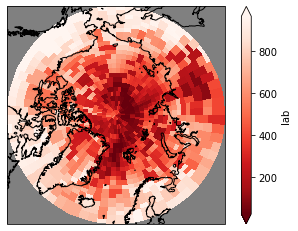

In [57]:


import cartopy.crs as ccrs

# air = xr.tutorial.open_dataset("air_temperature").air

dic = dict(projection=ccrs.Orthographic(0, 90), facecolor="gray")

f, ax = plt.subplots(subplot_kw=dic, )

p = d4[L].plot(
    # subplot_kws=dic,
    transform=ccrs.PlateCarree(),
#     norm=mpl.colors.LogNorm(vmin, vmax),
    robust=True,
    cmap='Reds_r'
)
#   p.axes.set_global()
p.axes.coastlines()

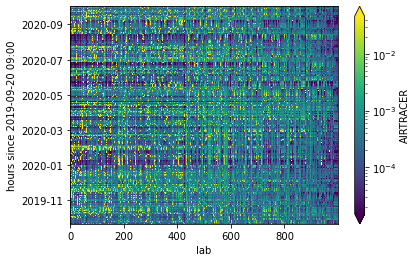

In [58]:
d4.groupby(L).sum().plot(norm=mpl.colors.LogNorm(),robust=True)

In [59]:
d4.to_netcdf(f'../data_out/cluster{NN}.nc')

In [ ]:
d4